<a href="https://colab.research.google.com/github/vathsal14/NOVO-NEUROTECH/blob/main/novonew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
# Installs the 'requests' library, which is used for making HTTP requests in Python. It simplifies interacting with web services and APIs.
# version: requests-2.32.3
!pip install mne
# Installs the 'mne' library, which is a powerful tool for processing, analyzing, and visualizing EEG, MEG, and other neurophysiological data.
# version: mne-1.9.0
!pip install pyedflib
# Installs the 'pyedflib' library, which allows reading and writing of EDF (European Data Format) and BDF (Biosemi Data Format) files, commonly used in EEG data storage.
# version: pyedflib-0.1.38
!pip install openneuro-py
# Installs the 'openneuro-py' library, a Python client for accessing and downloading datasets from OpenNeuro, a platform for neuroimaging data sharing.
# aiofiles-24.1.0 graphql-core-3.2.5 openneuro-py-2024.2.0 sgqlc-16.4
!pip install PyWavelets
# Installs the 'PyWavelets' library, which provides wavelet transform functions for signal processing, including denoising, feature extraction, and compression.
# version: PyWavelets-1.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.9 MB/s eta 0:00:00


In [ ]:
# Importing the Google Colab drive module
from google.colab import drive
# Mounting Google Drive to the Colab environment
# This allows you to access files stored in your Google Drive directly from the Colab notebook.
# The "/content/drive" is the directory where the Drive will be mounted.
# After mounting, you can interact with your Drive files as if they were local files.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install python-dotenv
# 'python-dotenv' is a library that allows you to manage environment variables from a `.env` file.
# This is particularly useful for securely storing sensitive information such as API keys, database credentials, etc.
# By using environment variables, you avoid hardcoding sensitive data directly in your code.

In [ ]:
import os  # The 'os' module is used to interact with the operating system, such as reading environment variables.
from dotenv import load_dotenv  # 'load_dotenv' is used to load environment variables from a .env file.
# Specify the path to the .env file
# The .env file stores environment variables like API keys securely.
# In this case, the .env file is located in the user's Google Drive.
env_path = '/content/drive/My Drive/ColabEnvFiles/API_KEY.env'
# Load the environment variables from the specified .env file
load_dotenv(env_path)
# Access the API key using the key name as defined in the .env file
api_key = os.getenv("OPENNEURO_API_KEY")
# Check if the API key was successfully loaded
if api_key:
    print("API Key loaded successfully!")  # Inform the user that the API key was loaded.
else:
    print("Failed to load API Key. Check your .env file and path.")  # Error message if loading fails.

API Key loaded successfully!


In [ ]:
import openneuro
from google.colab import widgets
import os

dataset_id = 'ds004584'
subject_id = input("Enter the subject ID (e.g., sub-01): ")

if not subject_id:
    raise ValueError("Subject ID must be provided.")

print(f"Processing dataset: {dataset_id}, subject: {subject_id}")

def create_directory(dir_path):
    try:
        os.makedirs(dir_path, exist_ok=True)
        print(f"Directory created successfully at: {dir_path}")
    except PermissionError:
        # Handle permission errors
        print(f"Permission denied: Unable to create directory at {dir_path}. Please check permissions.")
    except OSError as e:
        # Handle other OS-related errors
        print(f"Error creating directory at {dir_path}: {e}")
    except Exception as e:
        # Catch any unexpected errors
        print(f"An unexpected error occurred: {e}")

target_dir = os.path.join(os.getcwd(), dataset_id)
# This determines where to save the downloaded data on your computer.
# 'os.getcwd()' gets the current working directory (where the program is running).
# 'os.path.join' combines this directory with the dataset ID to create a folder for the dataset.
create_directory(target_dir)
# os.makedirs(target_dir, exist_ok=True)  # This creates the folder (directory) if it doesn’t already exist.

# Download data for the specific subject in the dataset
openneuro.download(dataset=dataset_id, target_dir=target_dir, include=[f'sub-{subject_id}'])
# This downloads data from the OpenNeuro platform.
# - 'dataset=dataset_id' specifies which dataset to download.
# - 'target_dir=target_dir' tells where to save the data on your computer.
# - 'include=[f'sub-{subject_id}']' limits the download to only data for the specified subject.
# It's like fetching specific files from a large online collection and saving them to your local computer.

Enter the subject ID (e.g., sub-01): 001
Processing dataset: ds004584, subject: 001
Directory created successfully at: /content/ds004584

👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004584 …


📁 Traversing directories for ds004584 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 12 files (5 concurrent downloads). 
✅ Finished downloading ds004584.
 
🧠 Please enjoy your brains.
 


In [ ]:
import os

dataset_id = 'ds004584'
subject_id = input("Enter the subject ID (e.g., 001, 002): ")

if not subject_id:
    raise ValueError("Subject ID must be provided.")

print(f"Processing dataset: {dataset_id}, subject: {subject_id}")

target_dir = os.path.join(os.getcwd(), dataset_id)

def create_directory(dir_path):
    try:
        os.makedirs(dir_path, exist_ok=True)
        print(f"Directory created successfully at: {dir_path}")
    except Exception as e:
        print(f"Error creating directory at {dir_path}: {e}")

create_directory(target_dir)

raw_fname = os.path.join(target_dir, f'sub-{subject_id}', 'eeg', f'sub-{subject_id}_task-Rest_eeg.set')

if os.path.exists(raw_fname):
    print(f"EEG data file found at: {raw_fname}")
else:
    print(f"EEG data file not found at: {raw_fname}")


Enter the subject ID (e.g., 001, 002): 001
Processing dataset: ds004584, subject: 001
Directory created successfully at: /content/ds004584
EEG data file found at: /content/ds004584/sub-001/eeg/sub-001_task-Rest_eeg.set


In [ ]:
with open(raw_fname, 'rb') as f:
    # This opens the file specified by 'raw_fname' in binary read mode ('rb').
    header = f.read(256)
    # Reads the first 256 bytes of the file and stores them in the variable 'header'.
    # In EEG or similar data files, the first few bytes (the "header") often contain metadata or information about the file's structure.
    print(header)

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed May 24 09:21:39 2023                                        \x00\x00\x00\x00\x00\x00\x00\x00\x00\x01IM\x0e\x00\x00\x008\x00\x00\x00\x06\x00\x00\x00\x08\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x00setname\x00\x04\x00\x00\x00\x00\x00\x00\x00\x0e\x00\x00\x00p\x00\x00\x00\x06\x00\x00\x00\x08\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x08\x00\x00\x00\x01\x00\x00\x00\x19\x00\x00\x00\x01\x00\x00\x00\x08\x00\x00\x00filename\x04\x00\x00\x002\x00\x00\x00'


Enter the subject ID (e.g., 001, 002): 001
Reading /content/ds004584/sub-001/eeg/sub-001_task-Rest_eeg.fdt
Reading 0 ... 140829  =      0.000 ...   281.658 secs...


<ipython-input-10-0105b22bf7f4>:15: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, P3, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 500.0 Hz
>
Number of channels: 63
Number of samples: 140830
Using matplotlib as 2D backend.


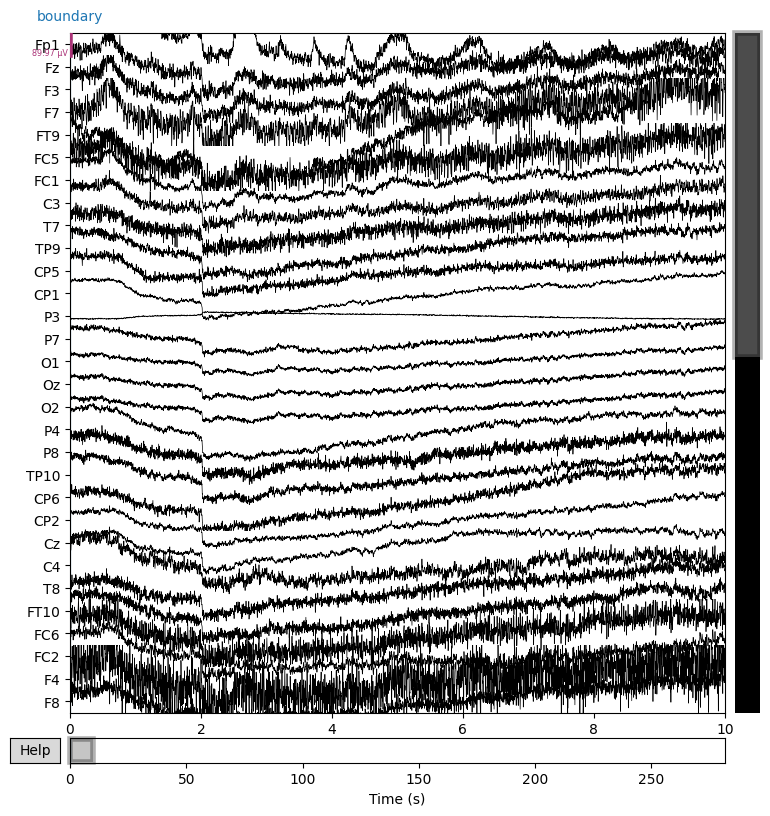

In [ ]:
import mne
import os

dataset_id = 'ds004584'
subject_id = input("Enter the subject ID (e.g., 001, 002): ")

target_dir = os.path.join(os.getcwd(), dataset_id)

raw_fname = os.path.join(target_dir, f'sub-{subject_id}', 'eeg', f'sub-{subject_id}_task-Rest_eeg.set')

try:
    raw = mne.io.read_raw_eeglab(raw_fname, preload=True)

    print(raw.info)
    print(f"Number of channels: {len(raw.info['ch_names'])}")
    print(f"Number of samples: {raw.n_times}")

    raw.plot(duration=10, n_channels=30, scalings='auto')

except Exception as e:
    print(f"Error reading EEGLAB .set file: {e}")

Reading /content/ds004584/sub-001/eeg/sub-001_task-Rest_eeg.fdt
Reading 0 ... 140829  =      0.000 ...   281.658 secs...


<ipython-input-11-c015d9827aab>:7: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, P3, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 500.0 Hz
>


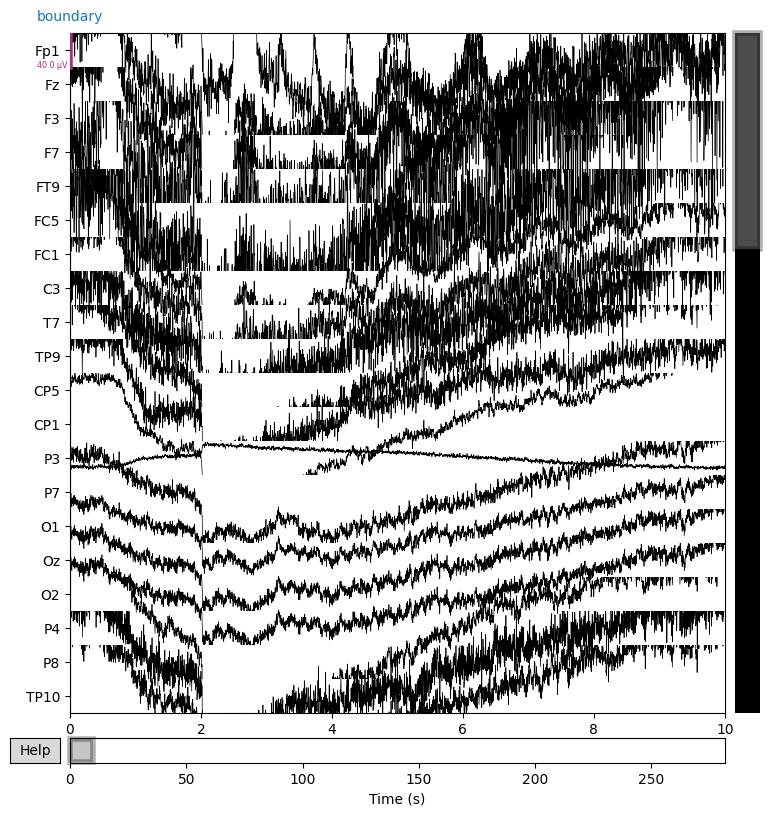

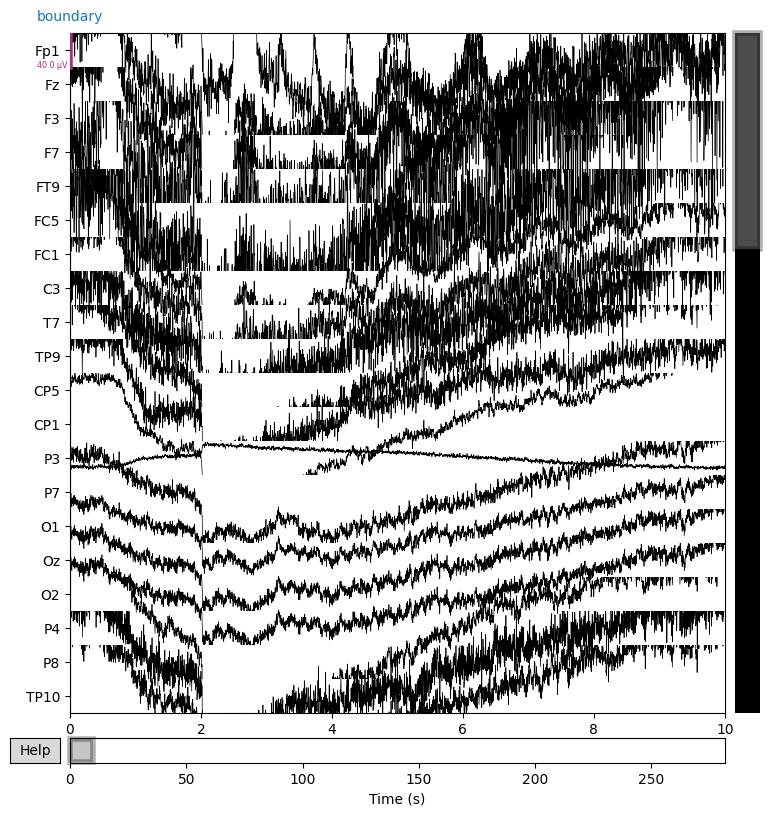

In [ ]:
import mne

raw_fname = '/content/ds004584/sub-001/eeg/sub-001_task-Rest_eeg.set'

raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
# - 'raw_fname' is the path to the EEG data file.
# - 'preload=True' ensures the data is loaded into memory for faster processing.
print(raw.info)
# This displays information about the EEG data, such as the number of channels, sampling rate, etc.
raw.plot()
# This opens an interactive plot of the raw EEG data, which allows you to visually inspect the signals.
# You can use this to identify patterns or potential artifacts in the data.


Enter the subject ID (e.g., 001, 002): 001
Processing EEG data file at: /content/ds004584/sub-001/eeg/sub-001_task-Rest_eeg.set
Reading /content/ds004584/sub-001/eeg/sub-001_task-Rest_eeg.fdt
Reading 0 ... 140829  =      0.000 ...   281.658 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, P3, P7, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 500.0 Hz
>
Remaining channels after drop: 55
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper

<ipython-input-66-929c279c3d53>:26: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Bandpass filtering applied (0.5-50 Hz).
Standard 10-20 montage applied.
Fitting ICA to data using 55 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 19.0s.
ICA decomposition completed.


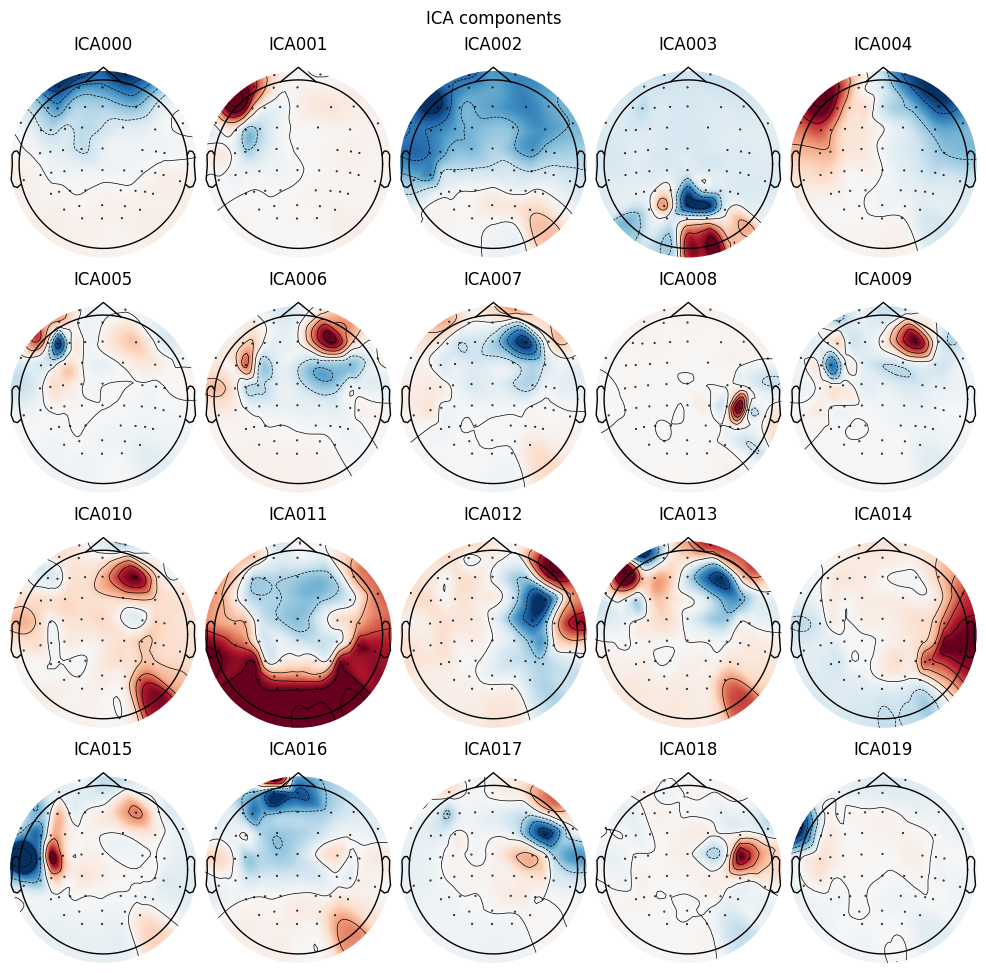

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 55 PCA components
ICA artifact removal applied.
Used Annotations descriptions: ['boundary']
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 1501 original time points ...
0 bad epochs dropped
Number of epochs created: 1


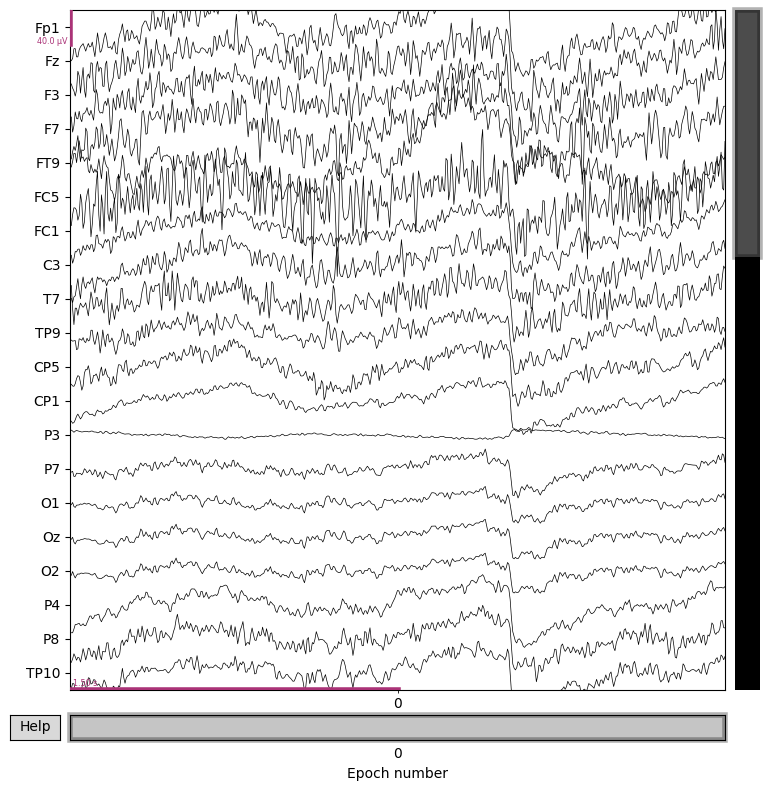

Number of epochs remaining after dropping bad ones: 1
Epoch normalization applied.
Frequency band power features extracted.
Overwriting existing file.
Overwriting existing file.
Preprocessed data saved to: ./preprocessed-epochs-001.fif
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 2048 is greater than input length  = 1501, using nperseg = 1501
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
<ipython-input-66-929c279c3d53>:130: RuntimeWarning: This filename (./preprocessed-epochs-001.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_normalized.save(output_file, overwrite=True)


Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
Power spectral density (PSD) plot completed.


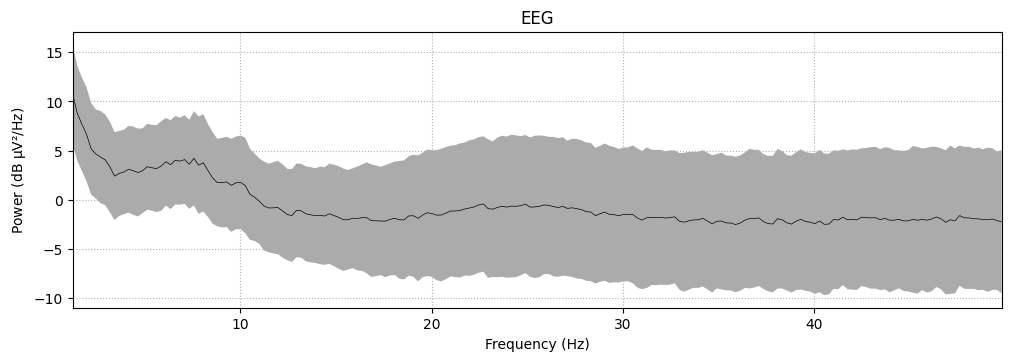

In [ ]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, welch
from scipy.signal import welch
import pandas as pd

dataset_id = 'ds004584'
subject_id = input("Enter the subject ID (e.g., 001, 002): ")

if not subject_id:
    raise ValueError("Subject ID must be provided.")

target_dir = os.path.join(os.getcwd(), dataset_id)
raw_fname = os.path.join(target_dir, f'sub-{subject_id}', 'eeg', f'sub-{subject_id}_task-Rest_eeg.set')

if not os.path.exists(raw_fname):
    raise FileNotFoundError(f"EEG data file not found at: {raw_fname}")
print(f"Processing EEG data file at: {raw_fname}")

raw = mne.io.read_raw_eeglab(raw_fname, preload=True)
print(raw.info)

auxiliary_channels = raw.ch_names[-8:]
raw = raw.drop_channels(auxiliary_channels)
print(f"Remaining channels after drop: {len(raw.ch_names)}")

raw_filtered = raw.filter(l_freq=0.5, h_freq=50, fir_design='firwin', verbose=True)
print("Bandpass filtering applied (0.5-50 Hz).")

montage = mne.channels.make_standard_montage("standard_1020")
raw_filtered.set_montage(montage, on_missing="ignore")
print("Standard 10-20 montage applied.")

ica = mne.preprocessing.ICA(n_components=20, random_state=42, max_iter=800)
ica.fit(raw_filtered)
print("ICA decomposition completed.")

ica.plot_components()

ica.exclude = [0, 1]
raw_cleaned = ica.apply(raw_filtered)
print("ICA artifact removal applied.")

events, event_id = mne.events_from_annotations(raw_cleaned)

epochs = mne.Epochs(
    raw_cleaned, events, event_id=event_id,
    tmin=0, tmax=3, baseline=(0, 0), detrend=1, preload=True
)
print(f"Number of epochs created: {len(epochs)}")
epochs.plot()

epochs.drop_bad()
print(f"Number of epochs remaining after dropping bad ones: {len(epochs)}")

epochs_data = epochs.get_data()

epochs_normalized_data = (epochs_data - epochs_data.mean(axis=2, keepdims=True)) / epochs_data.std(axis=2, keepdims=True)

epochs_normalized = epochs.copy()
epochs_normalized._data = epochs_normalized_data
print("Epoch normalization applied.")

freq_bands = {
    'delta': (1, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'gamma': (30, 50)
}

def compute_band_power(epoch_data, sfreq, freq_bands):
    power_features = {}
    num_channels = epoch_data.shape[0]
    channel_powers = []
    for chan_idx in range(num_channels):
        channel_data = epoch_data[chan_idx, :]
        channel_power_features = {}
        for band, (low, high) in freq_bands.items():
            f, psd = welch(channel_data, sfreq, nperseg=2048)
            psd = psd[(f >= low) & (f <= high)]
            power = np.sum(psd)
            channel_power_features[f'{band}_power'] = power
        channel_powers.append(channel_power_features)
    for band in freq_bands:
        band_key = f'{band}_power'
        power_features[band_key] = np.mean([chan_power[band_key] for chan_power in channel_powers])
    return power_features

epochs_band_power = []
for epoch_data in epochs_normalized.get_data():
    epoch_band_power = compute_band_power(epoch_data, epochs.info['sfreq'], freq_bands)
    epochs_band_power.append(epoch_band_power)

epochs_band_power_df = pd.DataFrame(epochs_band_power)
print("Frequency band power features extracted.")

output_file = f"./preprocessed-epochs-{subject_id}.fif"
epochs_normalized.save(output_file, overwrite=True)
print(f"Preprocessed data saved to: {output_file}")

raw_cleaned.plot_psd(fmin=1, fmax=50, average=True)
print("Power spectral density (PSD) plot completed.")

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import welch
from scipy.stats import skew, kurtosis
import mne
import os

dataset_id = 'ds004584'
subject_id = '001'

if not subject_id:
    raise ValueError("Subject ID must be provided.")

preprocessed_file = f"./preprocessed-epochs-{subject_id}.fif"  # Use f-string for subject_id
if not os.path.exists(preprocessed_file):
    raise FileNotFoundError(f"Preprocessed file not found at: {preprocessed_file}")

epochs = mne.read_epochs(preprocessed_file, preload=True)
print(f"Loaded preprocessed data: {preprocessed_file}")

freq_bands = {
    "delta": (1, 4),
    "theta": (4, 8),
    "alpha": (8, 12),
    "beta": (12, 30),
    "gamma": (30, 40)
}

eeg_data = epochs.get_data()
sfreq = epochs.info['sfreq']
channels = epochs.info['ch_names']

features = []

for epoch_idx, epoch_data in enumerate(eeg_data):
    for channel_idx, channel_name in enumerate(channels):
        channel_data = epoch_data[channel_idx, :]

        channel_features = {
            "epoch": epoch_idx,
            "channel": channel_name,
            "mean": np.mean(channel_data),
            "variance": np.var(channel_data),
            "skewness": skew(channel_data),
            "kurtosis": kurtosis(channel_data)
        }

        f, psd = welch(channel_data, sfreq, nperseg=1024)
        for band, (low, high) in freq_bands.items():
            band_power = np.sum(psd[(f >= low) & (f <= high)])
            channel_features[f"{band}_power"] = band_power

        psd_normalized = psd / np.sum(psd)
        entropy = -np.sum(psd_normalized * np.log(psd_normalized + 1e-10))
        channel_features["entropy"] = entropy

        features.append(channel_features)

features_df = pd.DataFrame(features)

output_file = "./eeg_features.csv"
features_df.to_csv(output_file, index=False)
print(f"Feature extraction complete. Features saved to: {output_file}")

Reading /content/preprocessed-epochs-001.fif ...
    Found the data of interest:
        t =       0.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Loaded preprocessed data: ./preprocessed-epochs-001.fif
Feature extraction complete. Features saved to: ./eeg_features.csv


<ipython-input-68-352e5cec0372>:21: RuntimeWarning: This filename (./preprocessed-epochs-001.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(preprocessed_file, preload=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features_df = pd.read_csv("./eeg_features.csv")
print(f"Loaded features: {features_df.shape}")

np.random.seed(42)
labels = np.random.choice([0, 1], size=features_df.shape[0])

X = features_df.drop(columns=["channel"])
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rfe_model = RandomForestClassifier(random_state=42)
rfe_selector = RFECV(estimator=rfe_model, step=1, cv=5, scoring='accuracy')
rfe_selector.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe_selector.support_]
print(f"Selected features ({len(selected_features)}): {selected_features}")

X_train_selected = X_train_scaled[:, rfe_selector.support_]
X_test_selected = X_test_scaled[:, rfe_selector.support_]

final_features_df = features_df[selected_features]
final_features_df.to_csv("selected_eeg_features.csv", index=False)
print("Selected features saved to 'selected_eeg_features.csv'.")

Loaded features: (55, 12)
Selected features (1): Index(['variance'], dtype='object')
Selected features saved to 'selected_eeg_features.csv'.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4402 - loss: 0.6934 - val_accuracy: 0.3333 - val_loss: 0.6976
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.7158 - loss: 0.6880 - val_accuracy: 0.3333 - val_loss: 0.7019
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7158 - loss: 0.6820 - val_accuracy: 0.3333 - val_loss: 0.7067
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7262 - loss: 0.6764 - val_accuracy: 0.3333 - val_loss: 0.7111
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7158 - loss: 0.6733 - val_accuracy: 0.3333 - val_loss: 0.7152
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7158 - loss: 0.6684 - val_accuracy: 0.3333 - val_loss: 0.7200
Test Accuracy: 0.6364
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      1.00      0.78         7


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


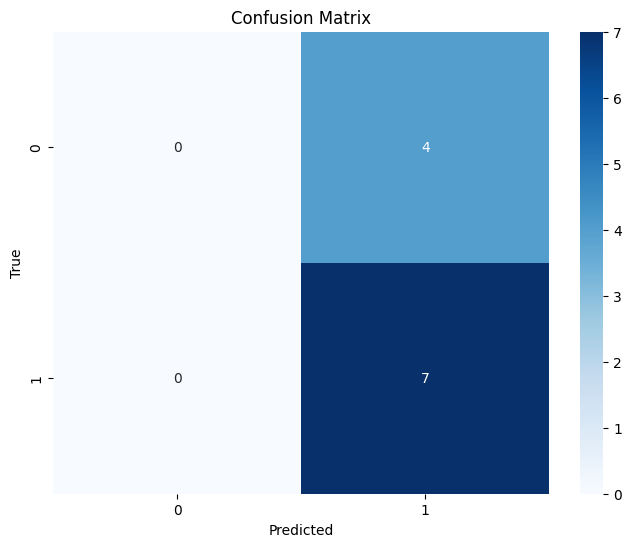

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

features_df = pd.read_csv("selected_eeg_features.csv")
labels = np.random.choice([0, 1], size=features_df.shape[0])
num_samples = features_df.shape[0]
num_features = features_df.shape[1]
X = features_df.values.reshape(num_samples, num_features, 1)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded)

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight={0: 1.0, 1: 1.0},
    callbacks=[early_stopping],
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Confusion Matrix:")
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(labels.value_counts())


1    29
0    26
Name: count, dtype: int64
